In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ocpa.objects.log.importer.ocel import factory as ocel_import_factory
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory
from models.baseline_measure import baseline_measure
from src.utils import get_happy_path_log, create_flower_model, generate_variant_model
from ocpa.objects.log.importer.csv import factory as ocel_import_factory_csv
import pickle

In [3]:
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator
from pm4py.objects.petri_net.obj import PetriNet, Marking

In [12]:
import pm4py
import os

In [13]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

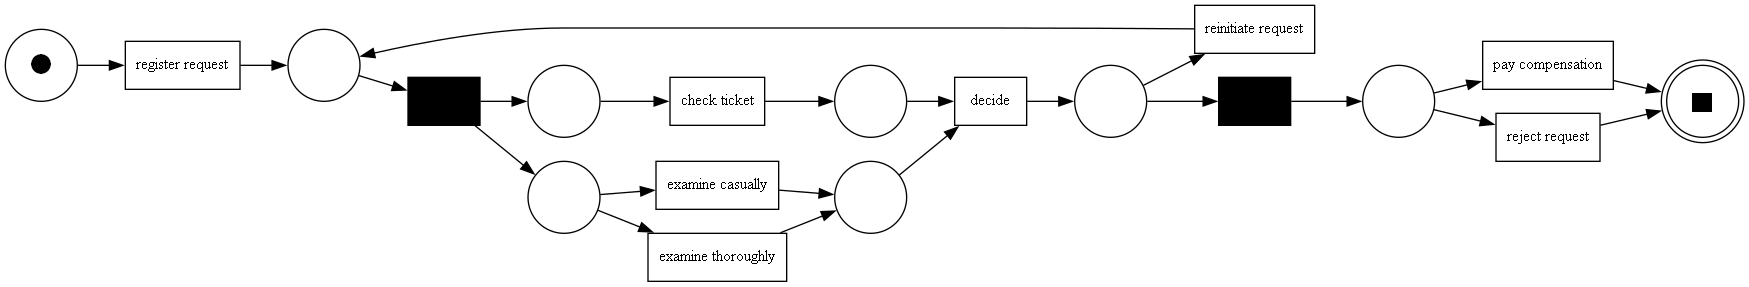

In [14]:
net, initial_marking, final_marking = pm4py.read_pnml("running-example.pnml")
pm4py.view_petri_net(net, initial_marking, final_marking)

In [15]:
simulated_log = simulator.apply(net, initial_marking, variant=simulator.Variants.BASIC_PLAYOUT, parameters={simulator.Variants.BASIC_PLAYOUT.value.Parameters.NO_TRACES: 50})

In [16]:
simulated_log

[{'attributes': {'concept:name': '0'}, 'events': [{'concept:name': 'register request', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 40)}, '..', {'concept:name': 'pay compensation', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 44)}]}, '....', {'attributes': {'concept:name': '49'}, 'events': [{'concept:name': 'register request', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 54, 21)}, '..', {'concept:name': 'pay compensation', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 54, 25)}]}]

In [44]:
f_out = "../src/data/playout/log_model.txt"

In [45]:
f_out

'../src/data/playout/log_model.txt'

In [65]:
def writeToFile(file, lst):
    with open(file, 'w') as outfile:
        traces = set()
        for entry in lst:
            trace = ""
            for index, ev in enumerate(entry):
                e = str(ev['concept:name'])
                #e = e[0:-1]
                if index == 0:
                    trace = trace + str(e)
                else:
                    trace = trace + " " + str(e)
            print(trace)
            traces.add(trace)
        for trace in traces:
            outfile.write(trace)
            outfile.write("\n")

In [66]:
writeToFile(f_out, simulated_log)

register request
examine thoroughly
check ticket
decide
pay compensation
register request examine thoroughly check ticket decide pay compensation
register request
examine casually
check ticket
decide
reinitiate request
examine casually
check ticket
decide
reject request
register request examine casually check ticket decide reinitiate request examine casually check ticket decide reject request
register request
examine casually
check ticket
decide
reinitiate request
examine casually
check ticket
decide
pay compensation
register request examine casually check ticket decide reinitiate request examine casually check ticket decide pay compensation
register request
examine thoroughly
check ticket
decide
reinitiate request
examine casually
check ticket
decide
reinitiate request
examine thoroughly
check ticket
decide
reject request
register request examine thoroughly check ticket decide reinitiate request examine casually check ticket decide reinitiate request examine thoroughly check ticket de

In [67]:
def readVariantFile(f_name, unique=False):
    """
    Reads Variant File

    :param f_name: filename
    :param unique: True or False
    :return:
    """
    traces = []
    with open(f_name) as file:
        file_contents = file.read()
        file_contents = file_contents.split("\n")
        for row in file_contents:
            if unique:
                if row not in traces:
                    traces.append(row)
            else:
                traces.append(row)

    f_traces = []
    for trace in traces:
        f_trace = []
        t = trace.split(" ")
        for i in t:
            if i != "" and "<" not in i:
                f_trace.append(str(i))
        if len(f_trace) > 0:
            f_traces.append(f_trace)

    return f_traces

In [68]:
gen = readVariantFile(f_out, unique=True)

In [69]:
gen

[['register',
  'request',
  'check',
  'ticket',
  'examine',
  'casually',
  'decide',
  'reinitiate',
  'request',
  'examine',
  'casually',
  'check',
  'ticket',
  'decide',
  'reinitiate',
  'request',
  'check',
  'ticket',
  'examine',
  'thoroughly',
  'decide',
  'reinitiate',
  'request',
  'examine',
  'casually',
  'check',
  'ticket',
  'decide',
  'reinitiate',
  'request',
  'check',
  'ticket',
  'examine',
  'casually',
  'decide',
  'reinitiate',
  'request',
  'examine',
  'thoroughly',
  'check',
  'ticket',
  'decide',
  'reject',
  'request'],
 ['register',
  'request',
  'examine',
  'thoroughly',
  'check',
  'ticket',
  'decide',
  'reject',
  'request'],
 ['register',
  'request',
  'check',
  'ticket',
  'examine',
  'thoroughly',
  'decide',
  'pay',
  'compensation'],
 ['register',
  'request',
  'examine',
  'casually',
  'check',
  'ticket',
  'decide',
  'reinitiate',
  'request',
  'examine',
  'thoroughly',
  'check',
  'ticket',
  'decide',
  'reini